# Final Assignment - Part 2

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information.

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021:

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other.

    What is the **shape** of the `fnd` DataFrame?

In [ ]:
# 1.
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

fnd = pd.DataFrame() #initialize the fnd as empty database
os.chdir('C:\\Users\\axmcr\\Downloads\\00_Boolean\\data') #set the directory to the data folder

for file in os.listdir():
    df_tmp = pd.read_excel(file) #read and store file in the temporary df
    df_tmp['Year'] = os.listdir()[os.listdir().index(file)][-9:-5] #add the year of the current file
    fnd = pd.concat([fnd, df_tmp], ignore_index=True) #concatenate the current file to the fnd df
fnd.sample(5) #verify the output

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
375,Unocoin,2013,"Tumkur, Karnataka",FinTech,Unocoin is an Indian bitcoin processor that en...,"Abhinand Kaseti, Harish B V, Sathvik Vishwanat...","Digital Finance Group, FundersClub",Undisclosed,Series A,2020
2121,Niro,2021,Bangalore,Financial Services,Embedding personal credit products into leadin...,"Aditya Kumar, Sankalp Mathur",Elevar Equity,$3500000,Seed,2021
774,Credit Mantri,2012,Chennai,Fintech,Offers free credit score and a detailed credit...,"Gowri Mukherjee, Ranjit Punja, Rajasundaram Su...","IDG Ventures, Elevar Equity, Accion","$792,000",NaN,2020
322,Tring,2019,Mumbai,Social Media,"Tring is a celebrity engagement platform, for ...","Akshay Saini, Rahul Saini, Pranav Chabhadia","Sujeet Kumar, Hemesh Singh",Undisclosed,NaN,2020
1183,LearnVern,2016,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",NaN,"$1,000,000",NaN,2021


In [ ]:
fnd.shape #verify the df shape

(2343, 10)

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types.

    What is the **total** `Amount($)` of funding given in the three years available?

In [ ]:
# 2.
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2343 non-null   int64 
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2343 non-null   int64 
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 183.2+ KB


In [ ]:
# 2.
#define function for cleaning errors in strings
def st_cleaner(col, find, replace, dtype):
    return col.astype(str).str.replace(find, replace, regex=False).astype(dtype)
#apply the function
for cname in ['Amount($)', 'Founded', 'Year']: #cycle through the list of columns
    if cname == 'Amount($)': #for the column 'Amount($)'
        fnd[cname] = st_cleaner(fnd[cname], '$','','str')
        fnd[cname] = st_cleaner(fnd[cname], ',','','str')
        fnd[cname] = st_cleaner(fnd[cname], 'Undisclosed','0','str')
        fnd[cname] = st_cleaner(fnd[cname], 'nan','0','str')
    elif cname == 'Founded': #for the column 'Founded'
        fnd[cname] = st_cleaner(fnd[cname], '-','0','str')
        fnd[cname] = st_cleaner(fnd[cname], 'nan','0','str')
    fnd[cname] = fnd[cname].astype('float').astype('int') #for each  column
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2343 non-null   int64 
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2343 non-null   int64 
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 183.2+ KB


In [ ]:
# 2.
print(fnd['Amount($)'].sum())

271544633855


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021).

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [ ]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [ ]:
# 3.
fnd_2020 = fnd[fnd.Year == 2020].groupby('Investor', as_index=False).size().sort_values('size', ascending=False).reset_index()
rank = fnd_2020[fnd_2020.Investor == 'Inflection Point Ventures'].index[0] + 1
print("Rank in 2020:", rank)

Rank in 2020: 4


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**:
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame:
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city?

In [ ]:
# 4.
sps = pd.read_excel('C:\\Users\\axmcr\\Downloads\\00_Boolean\\Software Professionals Salary.xlsx')

In [ ]:
# 4.1.
sps_loc = sps.groupby('Location', as_index=False)[['Rating','Salary']].mean()
sps_loc.sample(5)

,Location,Rating,Salary
8,New Delhi,3.943415,658756.735632
3,Jaipur,3.940741,629135.802469
0,Bangalore,3.920232,735344.739593
2,Hyderabad,3.914484,679099.157376
9,Pune,3.886082,690476.311153


In [ ]:
# 4.2.
fnd_c = fnd[fnd.Year == 2021].groupby('HeadQuarter', as_index=False)['Company/Brand'].count() # calculate the total number of 'Company/Brand' funded
fnd_s = fnd[fnd.Year == 2021].groupby('HeadQuarter', as_index=False)['Amount($)'].sum() # calculate the sum = total 'Amount($)' invested
fnd_loc = fnd_c.merge(fnd_s, how='inner', on='HeadQuarter') # join the two tables to return the reqired df
fnd_loc.sample(5)

,HeadQuarter,Company/Brand,Amount($)
65,Thiruvananthapuram,1,0
30,Jodhpur,1,100000
11,Coimbatore,3,6400000
1,Ahmedabad,11,198155000
41,Nagpur,1,350000


In [ ]:
# 4.3.
sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')
sps_fnd_loc.sample(5)

,Location,Rating,Salary,HeadQuarter,Company/Brand,Amount($)
4,Kolkata,4.024719,710925.573034,Kolkata,5,28000000
2,Hyderabad,3.914484,679099.157376,Hyderabad,34,243960000
7,Pune,3.886082,690476.311153,Pune,46,509070000
1,Chennai,3.902726,584559.661513,Chennai,40,717140000
6,New Delhi,3.943415,658756.735632,New Delhi,143,1673010000


In [ ]:
# 4.4.1.
sps_fnd_loc.drop('HeadQuarter', axis=1, inplace=True)
# 4.4.2.
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)']/1000000
# 4.4.3.
sps_fnd_loc.drop('Amount($)', axis=1, inplace=True)
# 4.4.4.
sps_fnd_loc = sps_fnd_loc.rename(columns={'Location':'City',
                                          'Rating':'Avg. Rating',
                                          'Salary':'Avg. Salary',
                                          'Company/Brand':'Nr. Companies Funded',
                                          'Amount($MM)':'Sum Funding ($MM)'})
sps_fnd_loc.head()

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00


In [ ]:
# Question
ncf = sps_fnd_loc.sort_values(by='Avg. Rating', ascending=False).iloc[0]['Nr. Companies Funded'] # sort by rating, take the first row (highest rating) and save the value of the 'Nr. Companies Funded' column into a variable
print("The 'City' with the highest rating is Kolkata and the 'Nr. Companies Funded' in that city is:", ncf)

The 'City' with the highest rating is Kolkata and the 'Nr. Companies Funded' in that city is: 5


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees?

Text(0.05, -0.05, "The 'City' which stands out for total funding received by companies and salary paid is 'Mumbai'")

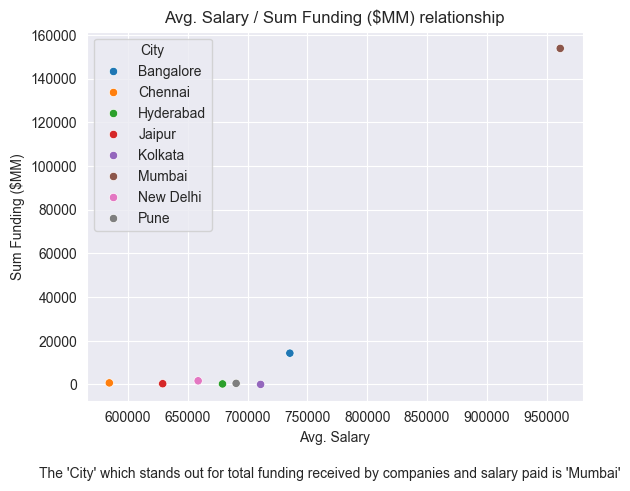

In [ ]:
# 5.
sns.set_style('darkgrid')
sns.scatterplot(x='Avg. Salary',
                y='Sum Funding ($MM)',
                data=sps_fnd_loc,
                hue='City'
                ).set_title('Avg. Salary / Sum Funding ($MM) relationship')
plt.figtext(0.05, -0.05,"The 'City' which stands out for total funding received by companies and salary paid is 'Mumbai'")